# Homework 4 Problem 3: Newton Fractals

The sensitivity of Newton’s method to initial conditions can be studied by considering the "basin of attractions" of the different critical points of the function. An initial point $x_0$ belongs to the basin of attraction for a critical point $r$ if Newton's method started at point $x_0$ converges to $r.$ 

The way in which the different basins of attraction partition the space gives us a sense of the sensitivity of Newton's method. This is beautifully demonstrated using plots over the complex plane known as Newton fractals.

The following code gives you a setup to easily draw the basins of attractions of Newton's method for functions defined over the complex plane -- don't worry about the complex part here, for the functions we are using the differentiation rules are the same as over the reals. 

The function ``newton's method(f1,f2,z)`` runs Newton's method at point $z$ on a function with first derivative ``f1`` and second derivative ``f2`` for a maximum of $40$ iterations, or until the method has converged.

The function ``draw(f1,f2,img,size)`` creates a ``size`` by ``size`` grid of the $[-1,1] \times [-1,1]$ square. For each node $u$ of the grid, it run Newton's method to determine the root to which it converges, if any. The point $u$ is then colored according to the root to which it converged. In this way, the basins of attraction can be visualized as colored regions on the plane.  




In [17]:
# Written by Austin Walters
# 


from matplotlib.pyplot import imshow, show
import numpy as np
from PIL import Image

# -1 <= x <= 1
x_min = -1.0
x_max = 1.0

# -i <= y <= i
y_min = -1.0
y_max = 1.0

# color scheme
colors = [\
(180, 0, 30), (0, 180, 30), (0, 30, 180), \
(0, 190, 180), (180, 0, 175), (180, 255, 0), \
(155, 170, 180), (70, 50, 0), (255, 255, 255)]



# Newton's method
def newtons_method(f1, f2, z):
 
   # Fourty iterations for safe measure
    for i in range(40):

        zplus = z - f1(z)/f2(z)

        # Checks for Overflow
        if abs(f1(z)) > 10e10:
             return None
        # Checks for underflow
        if abs(f1(z)) < 10e-14:
            return None
        # Checks for convergence
        if abs(zplus - z) < 10e-4:
            return z
        z = zplus

    return None

# Draws the functions
def draw(f1, f2, img, size):
    
    roots = []
    for y in range(size):
        z_y = y * (y_max - y_min)/(size - 1) + y_min
        for x in range(size):
            z_x = x * (x_max - x_min)/(size - 1) + x_min
            root = newtons_method(f1, f2, complex(z_x, z_y))
            if root:
                flag = False
                for test_root in roots:
                    if abs(test_root - root) < 10e-3:
                        root = test_root
                        flag = True
                        break
                if not flag:
                    roots.append(root)
            if root:
                img.putpixel((x, y), colors[roots.index(root)])

Next, we show how to produce the visualizations of the basins of attraction for the function $f(z) = \frac{z^4}{4} - z.$ The derivatives of this function are:
$$
f'(z) = z^3 - 1,\\
f''(z) = 3 \cdot z^2
$$
The critical points of $f$ in the complex plane are the cubic roots of unity:
$$
(1,e^{\frac{2}{3}\pi i}, e^{\frac{4}{3}\pi i}).
$$

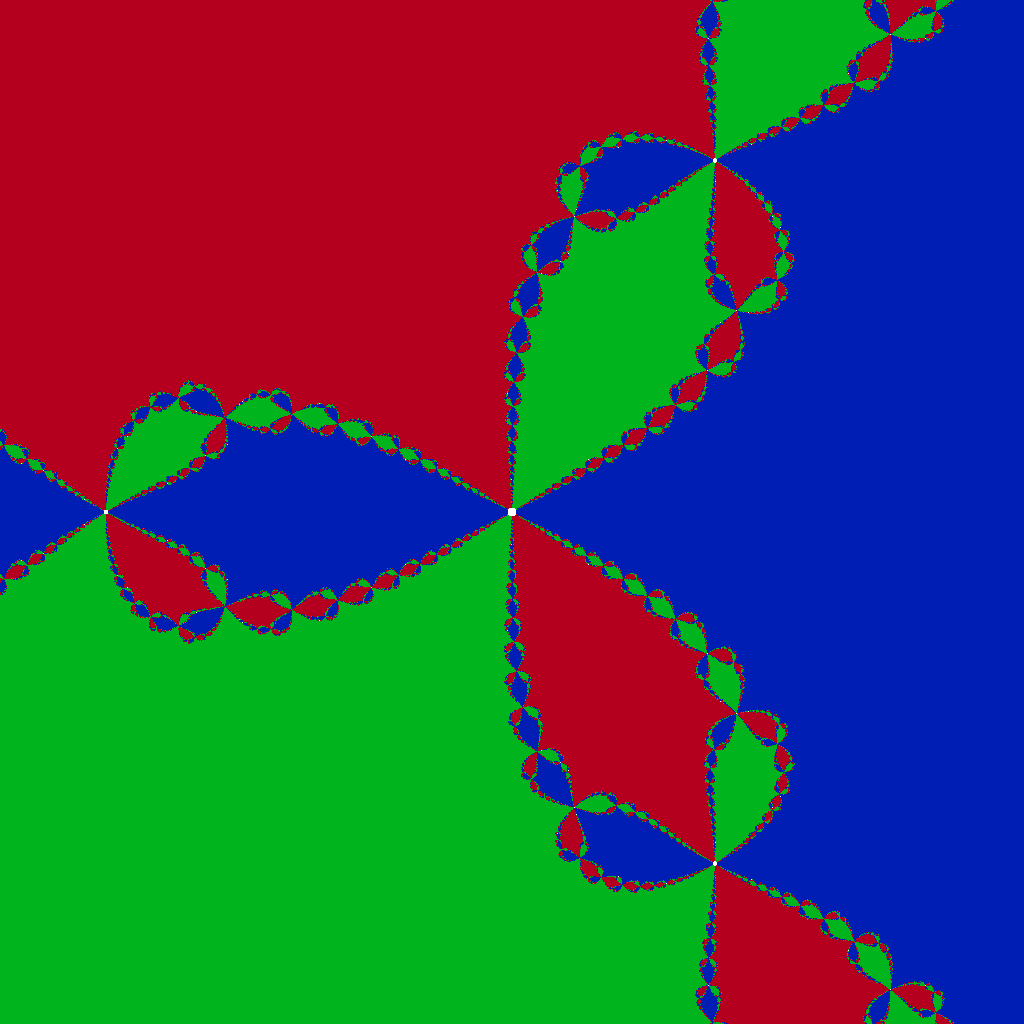

In [19]:
# function definitions for f=1/4*z^4 - z
f1 = lambda z : z * z * z - 1.0
f2 = lambda z : 3.0 * (z*z)

size = 1024
img = Image.new("RGB", (size, size), (255, 255, 255))

draw(f1, f2, img, size)

img